# Họ và tên: Bùi thị Bích Hậu 
# Mssv:      19521483
# Bài tập 8

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.layers import Conv2D,MaxPooling2D,Flatten,AveragePooling2D,Dense,Input
from keras import Sequential
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


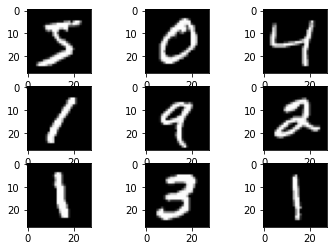

In [4]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap=plt.get_cmap('gray'))

plt.show()

In [5]:
ohe = preprocessing.OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train_oh =  ohe.fit_transform(y_train).toarray()
y_test_oh =  ohe.fit_transform(y_test).toarray()
y_train_oh.shape
y_test_oh.shape

(10000, 10)

In [6]:
x_train_norm = x_train/255.0
x_test_norm = x_test/255.0

x_train_norm = x_train_norm[:,:,:, np.newaxis]
x_test_norm = x_test_norm[:,:,:, np.newaxis]

x_train_norm.shape

(60000, 28, 28, 1)

In [7]:
class MiniResNet:
    def __init__(self):
        self.model = None

    def build(self,input_dim):
        self.model = Sequential([
                                 Conv2D(8,(3,3),padding='same',activation='relu',input_shape = input_dim),
                                 MaxPooling2D((2,2),strides=2),
                                 Conv2D(16,(3,3), padding='same', activation='relu', strides=(2,2)),
                                 AveragePooling2D((2,2)),
                                 Flatten(),
                                 Dense(400,activation='relu'),
                                 Dense(10,activation='softmax')
                                 ])

        self.model.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    def summary(self):
        self.model.summary()

    def train(self,x_train,y_train,x_val,y_val):
        return self.model.fit(x_train,y_train,validation_data =(x_val,y_val), epochs =50, batch_size =128)

    def predict(self, x_test):
        return self.model.predict(x_test)

In [8]:
cnn = MiniResNet()
cnn.build((28,28,1))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          1168      
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 16)         0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 400)               5

In [9]:
history = cnn.train(x_train_norm,y_train_oh,x_test_norm,y_test_oh)

Epoch 1/50
469/469 [==============================] - 34s 8ms/step - loss: 0.5983 - accuracy: 0.8161 - val_loss: 0.2647 - val_accuracy: 0.9144
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1916 - accuracy: 0.9402 - val_loss: 0.1320 - val_accuracy: 0.9591
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1300 - accuracy: 0.9596 - val_loss: 0.1107 - val_accuracy: 0.9639
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1051 - accuracy: 0.9671 - val_loss: 0.0875 - val_accuracy: 0.9725
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0894 - accuracy: 0.9715 - val_loss: 0.0854 - val_accuracy: 0.9713
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0772 - accuracy: 0.9755 - val_loss: 0.0729 - val_accuracy: 0.9765
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0690 - accuracy: 0.9779 - val_loss: 0.0718 - val_accuracy: 0.9783
Epoch

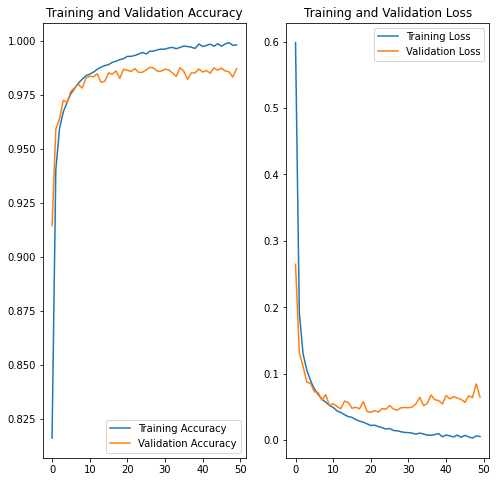

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()